In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
nba = pd.read_csv("final.csv")
nba

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,182.88,74.842680,31.1,3.8,4.6,2000-01,SG,42.0,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.12,98.883056,29.8,3.9,5.1,2000-01,SG,40.2,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,215.90,142.881480,28.7,12.7,3.7,2000-01,C,39.5,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,200.66,95.254320,28.5,5.9,5.0,2000-01,SG,40.9,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.12,102.058200,27.6,5.5,3.9,2000-01,SF,39.7,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12255,David Wingate,36,195.58,83.914520,0.3,0.3,0.4,1999-00,SG,4.6,...,0.000,-5.0,0.111,3.7,13.4,18.2,16.3,-0.1,-0.1,-11.6
12256,Derek Hood,23,203.20,104.326160,0.0,0.5,0.0,1999-00,PF,2.0,...,0.000,-24.2,0.000,14.1,0.0,0.0,33.6,-0.1,0.0,-29.5
12257,Rodrick Rhodes,26,198.12,102.058200,0.0,1.0,0.0,1999-00,SF,8.0,...,0.000,-9.2,0.000,6.7,0.0,40.0,27.6,-0.1,0.0,-14.9
12258,Mario Bennett,26,198.12,106.594120,0.0,2.0,0.0,1999-00,PF,3.0,...,0.000,-25.5,0.000,37.2,0.0,0.0,44.4,-0.1,0.0,-44.2


In [4]:
print(nba.columns)

Index(['normalized_name', 'age', 'player_height', 'player_weight', 'pts',
       'reb', 'ast', 'season', 'Pos.x', 'MP.x', 'Tm.x', 'G.x', 'GS', 'eFG.',
       'X3P', 'X3PA', 'X3P.', 'X3PAr', 'X2P', 'X2PA', 'X2P.', 'FT', 'FTA',
       'FT.', 'PER', 'TS.', 'TRB.', 'AST.', 'TOV.', 'USG.', 'WS', 'VORP',
       'BPM'],
      dtype='object')


In [5]:
nba

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,182.88,74.842680,31.1,3.8,4.6,2000-01,SG,42.0,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.12,98.883056,29.8,3.9,5.1,2000-01,SG,40.2,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,215.90,142.881480,28.7,12.7,3.7,2000-01,C,39.5,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,200.66,95.254320,28.5,5.9,5.0,2000-01,SG,40.9,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.12,102.058200,27.6,5.5,3.9,2000-01,SF,39.7,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12255,David Wingate,36,195.58,83.914520,0.3,0.3,0.4,1999-00,SG,4.6,...,0.000,-5.0,0.111,3.7,13.4,18.2,16.3,-0.1,-0.1,-11.6
12256,Derek Hood,23,203.20,104.326160,0.0,0.5,0.0,1999-00,PF,2.0,...,0.000,-24.2,0.000,14.1,0.0,0.0,33.6,-0.1,0.0,-29.5
12257,Rodrick Rhodes,26,198.12,102.058200,0.0,1.0,0.0,1999-00,SF,8.0,...,0.000,-9.2,0.000,6.7,0.0,40.0,27.6,-0.1,0.0,-14.9
12258,Mario Bennett,26,198.12,106.594120,0.0,2.0,0.0,1999-00,PF,3.0,...,0.000,-25.5,0.000,37.2,0.0,0.0,44.4,-0.1,0.0,-44.2


In [6]:
max_gp_season = nba.groupby('season')['G.x'].max()
nba = nba[nba['G.x'] >= 0.30 * nba['season'].map(max_gp_season)]
nba

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,182.88,74.842680,31.1,3.8,4.6,2000-01,SG,42.0,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.12,98.883056,29.8,3.9,5.1,2000-01,SG,40.2,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,215.90,142.881480,28.7,12.7,3.7,2000-01,C,39.5,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,200.66,95.254320,28.5,5.9,5.0,2000-01,SG,40.9,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.12,102.058200,27.6,5.5,3.9,2000-01,SF,39.7,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,Laron Profit,22,195.58,92.532768,1.5,0.8,0.8,1999-00,SG,6.8,...,0.400,4.4,0.386,6.7,16.7,23.1,16.2,-0.3,-0.2,-5.8
12235,Michael Stewart,25,208.28,104.326160,1.4,2.2,0.1,1999-00,C,9.3,...,0.563,5.4,0.432,13.5,2.2,20.2,9.6,0.2,-0.6,-8.2
12241,Chris Dudley,35,210.82,117.933920,1.2,2.9,0.1,1999-00,C,9.8,...,0.333,6.1,0.349,17.6,1.6,18.6,10.0,0.5,-0.4,-5.2
12242,Reggie Jordan,32,193.04,88.450440,1.1,1.1,0.9,1999-00,PG,6.8,...,0.538,6.7,0.349,9.7,19.1,24.4,14.2,-0.2,-0.1,-3.0


In [7]:
correlation_matrix = nba.corr()

C:\Users\Nela\AppData\Local\Temp\ipykernel_6672\1213336279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nba.corr()


In [8]:
correlation_with_pts = correlation_matrix['pts'].sort_values(ascending=False)
correlation_with_reb = correlation_matrix['reb'].sort_values(ascending=False)
correlation_with_ast = correlation_matrix['ast'].sort_values(ascending=False)

correlation_with_pts, correlation_with_reb, correlation_with_ast

(pts              1.000000
 X2P              0.899665
 X2PA             0.898181
 FT               0.892446
 MP.x             0.875386
 FTA              0.871571
 USG.             0.768444
 PER              0.763648
 WS               0.748609
 VORP             0.747775
 GS               0.708390
 BPM              0.687376
 ast              0.622504
 reb              0.552754
 X3PA             0.541421
 X3P              0.531688
 G.x              0.404822
 AST.             0.398160
 TS.              0.380775
 FT.              0.346278
 eFG.             0.257297
 X3P.             0.244264
 X2P.             0.199935
 X3PAr            0.029162
 age             -0.027099
 TRB.            -0.037353
 player_weight   -0.039032
 player_height   -0.062407
 TOV.            -0.279199
 Name: pts, dtype: float64,
 reb              1.000000
 TRB.             0.696261
 X2P              0.694983
 X2PA             0.644411
 WS               0.629760
 PER              0.624596
 MP.x             0.616096


In [9]:
features_pts_extended = correlation_with_pts.index[1:16].tolist()  # Exclude the target variable itself
features_reb_extended = correlation_with_reb.index[1:15].tolist()
features_ast_extended = correlation_with_ast.index[1:13].tolist()
features_ast_extended.append(correlation_with_ast.idxmin())

In [10]:
y_pts = nba['pts']
y_reb = nba['reb']
y_ast = nba['ast']

X_pts_extended = nba[features_pts_extended]
X_reb_extended = nba[features_reb_extended]
X_ast_extended = nba[features_ast_extended]

# Splitting the data into training and testing sets with extended features (80% training, 20% testing)
X_train_pts_ext, X_test_pts_ext, y_train_pts_ext, y_test_pts_ext = train_test_split(X_pts_extended, y_pts, test_size=0.2, random_state=0)
X_train_reb_ext, X_test_reb_ext, y_train_reb_ext, y_test_reb_ext = train_test_split(X_reb_extended, y_reb, test_size=0.2, random_state=0)
X_train_ast_ext, X_test_ast_ext, y_train_ast_ext, y_test_ast_ext = train_test_split(X_ast_extended, y_ast, test_size=0.2, random_state=0)

In [11]:
model_pts_ext = LinearRegression()
model_reb_ext = LinearRegression()
model_ast_ext = LinearRegression()

# Train the models with extended features
model_pts_ext.fit(X_train_pts_ext, y_train_pts_ext)
model_reb_ext.fit(X_train_reb_ext, y_train_reb_ext)
model_ast_ext.fit(X_train_ast_ext, y_train_ast_ext)

LinearRegression()

In [12]:
y_pred_pts_ext = model_pts_ext.predict(X_test_pts_ext)
y_pred_reb_ext = model_reb_ext.predict(X_test_reb_ext)
y_pred_ast_ext = model_ast_ext.predict(X_test_ast_ext)

# Calculate the performance metrics with extended features
mse_pts_ext = mean_squared_error(y_test_pts_ext, y_pred_pts_ext)
mse_reb_ext = mean_squared_error(y_test_reb_ext, y_pred_reb_ext)
mse_ast_ext = mean_squared_error(y_test_ast_ext, y_pred_ast_ext)
r2_pts_ext = r2_score(y_test_pts_ext, y_pred_pts_ext)
r2_reb_ext = r2_score(y_test_reb_ext, y_pred_reb_ext)
r2_ast_ext = r2_score(y_test_ast_ext, y_pred_ast_ext)

In [13]:
print("Performance Metrics with Extended Features:")
print(f"Mean Squared Error (PTS): {mse_pts_ext:.2f}")
print(f"R-squared (PTS): {r2_pts_ext:.2f}")
print(f"Mean Squared Error (REB): {mse_reb_ext:.2f}")
print(f"R-squared (REB): {r2_reb_ext:.2f}")
print(f"Mean Squared Error (AST): {mse_ast_ext:.2f}")
print(f"R-squared (AST): {r2_ast_ext:.2f}")

Performance Metrics with Extended Features:
Mean Squared Error (PTS): 0.01
R-squared (PTS): 1.00
Mean Squared Error (REB): 0.45
R-squared (REB): 0.92
Mean Squared Error (AST): 0.21
R-squared (AST): 0.94


In [16]:
cross_val_scores_pts_original = cross_val_score(model_pts_ext, X_pts_extended, y_pts, cv=5, scoring='r2')
cross_val_scores_reb_original = cross_val_score(model_reb_ext, X_reb_extended, y_reb, cv=5, scoring='r2')
cross_val_scores_ast_original = cross_val_score(model_ast_ext, X_ast_extended, y_ast, cv=5, scoring='r2')

In [18]:
avg_cross_val_score_pts_original = cross_val_scores_pts_original.mean()
avg_cross_val_score_reb_original = cross_val_scores_reb_original.mean()
avg_cross_val_score_ast_original = cross_val_scores_ast_original.mean()

print(f"Cross Validation (PTS): {avg_cross_val_score_pts_original:.2f}")
print(f"Cross Validation (REB): {avg_cross_val_score_reb_original:.2f}")
print(f"Cross Validation (AST): {avg_cross_val_score_ast_original:.2f}")

Cross Validation (PTS): 1.00
Cross Validation (REB): 0.92
Cross Validation (AST): 0.94


In [19]:
features_position = nba.drop(columns=["Pos.x", 'normalized_name', 'season', "Tm.x"])  # Removing non-numeric and target columns
target_position = nba["Pos.x"]

In [20]:
label_encoder = LabelEncoder()
target_position_encoded = label_encoder.fit_transform(target_position)

In [21]:
features_position

,age,player_height,player_weight,pts,reb,ast,MP.x,G.x,GS,eFG.,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,26,182.88,74.842680,31.1,3.8,4.6,42.0,71,71,0.447,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,26,198.12,98.883056,29.8,3.9,5.1,40.2,80,80,0.445,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,29,215.90,142.881480,28.7,12.7,3.7,39.5,74,74,0.572,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,22,200.66,95.254320,28.5,5.9,5.0,40.9,68,68,0.484,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,24,198.12,102.058200,27.6,5.5,3.9,39.7,75,75,0.509,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,22,195.58,92.532768,1.5,0.8,0.8,6.8,33,1,0.381,...,0.400,4.4,0.386,6.7,16.7,23.1,16.2,-0.3,-0.2,-5.8
12235,25,208.28,104.326160,1.4,2.2,0.1,9.3,42,1,0.377,...,0.563,5.4,0.432,13.5,2.2,20.2,9.6,0.2,-0.6,-8.2
12241,35,210.82,117.933920,1.2,2.9,0.1,9.8,47,3,0.343,...,0.333,6.1,0.349,17.6,1.6,18.6,10.0,0.5,-0.4,-5.2
12242,32,193.04,88.450440,1.1,1.1,0.9,6.8,36,0,0.321,...,0.538,6.7,0.349,9.7,19.1,24.4,14.2,-0.2,-0.1,-3.0


In [22]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(features_position, target_position_encoded, test_size=0.2, random_state=0)

# Initialize the Decision Tree Classifier model
model_position = DecisionTreeClassifier(random_state=0)

# Train the model
model_position.fit(X_train_pos, y_train_pos)

# Predictions on the test set
y_pred_pos = model_position.predict(X_test_pos)

# Calculate the performance metrics
accuracy_pos = accuracy_score(y_test_pos, y_pred_pos)
classification_report_pos = classification_report(y_test_pos, y_pred_pos, target_names=label_encoder.classes_)

print(accuracy_pos)
print(classification_report_pos)

0.6713780918727915
              precision    recall  f1-score   support

           C       0.75      0.73      0.74       380
          PF       0.53      0.60      0.56       383
          PG       0.82      0.83      0.83       393
          SF       0.61      0.55      0.58       410
          SG       0.65      0.66      0.66       415

    accuracy                           0.67      1981
   macro avg       0.67      0.67      0.67      1981
weighted avg       0.67      0.67      0.67      1981



In [23]:
# Updating the specified predictors by replacing 'TRB' with 'TRB.'
specified_features_updated = ['player_height', 'player_weight', 'pts', 'X3PA', 'X2P.', 'TRB.', 'AST.', 'USG.']

# Splitting data into updated specified features and target variable
X_pos_specified_updated = nba[specified_features_updated]

# Splitting the data into training and testing sets with updated specified features (80% training, 20% testing)
X_train_pos_spec_updated, X_test_pos_spec_updated, y_train_pos_spec_updated, y_test_pos_spec_updated = train_test_split(X_pos_specified_updated, target_position_encoded, test_size=0.2, random_state=0)

# Initialize the Decision Tree Classifier model with updated specified features
model_position_spec_updated = DecisionTreeClassifier(random_state=0)

# Train the model with updated specified features
model_position_spec_updated.fit(X_train_pos_spec_updated, y_train_pos_spec_updated)

# Predictions on the test set with updated specified features
y_pred_pos_spec_updated = model_position_spec_updated.predict(X_test_pos_spec_updated)

# Calculate the performance metrics with updated specified features
accuracy_pos_spec_updated = accuracy_score(y_test_pos_spec_updated, y_pred_pos_spec_updated)
classification_report_pos_spec_updated = classification_report(y_test_pos_spec_updated, y_pred_pos_spec_updated, target_names=label_encoder.classes_)

print(accuracy_pos_spec_updated)
print(classification_report_pos_spec_updated)


0.6991418475517416
              precision    recall  f1-score   support

           C       0.77      0.80      0.78       380
          PF       0.61      0.62      0.61       383
          PG       0.83      0.84      0.84       393
          SF       0.64      0.58      0.61       410
          SG       0.64      0.67      0.65       415

    accuracy                           0.70      1981
   macro avg       0.70      0.70      0.70      1981
weighted avg       0.70      0.70      0.70      1981



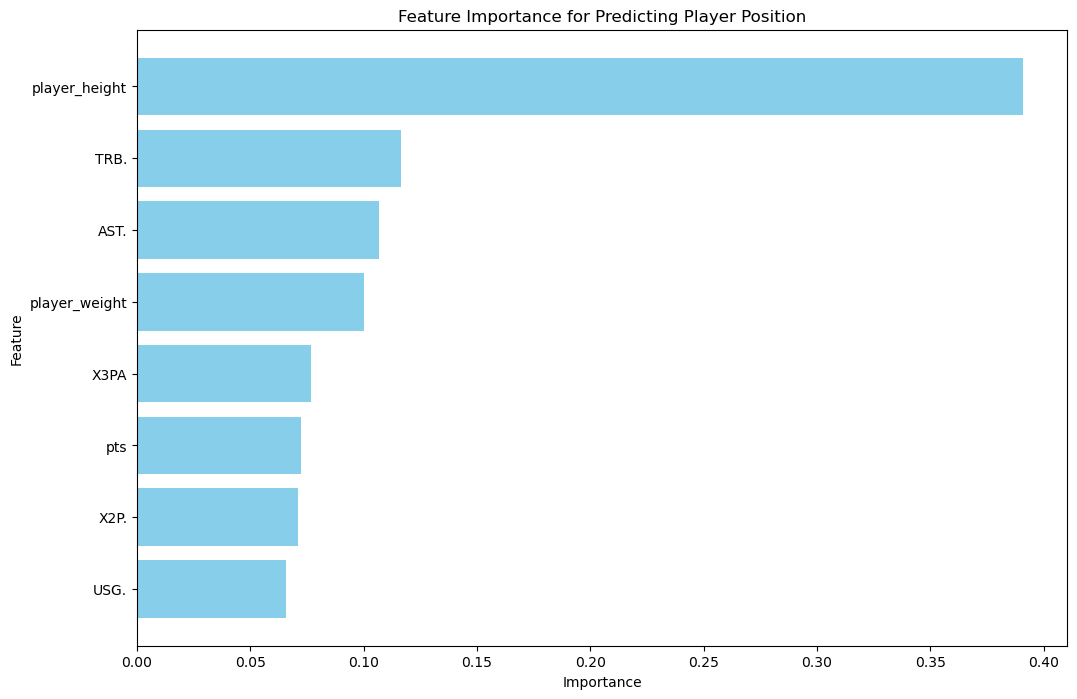

,Feature,Importance
0,player_height,0.390791
5,TRB.,0.116327
6,AST.,0.106940
1,player_weight,0.100135
3,X3PA,0.076889
2,pts,0.072212
4,X2P.,0.071009
7,USG.,0.065698


In [24]:
feature_importances = model_position_spec_updated.feature_importances_

# Creating a DataFrame to hold feature names and their corresponding importance values
feature_importances_df = pd.DataFrame({
    'Feature': specified_features_updated,
    'Importance': feature_importances
})

# Sorting the DataFrame based on the importance values
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Player Position')
plt.gca().invert_yaxis()  # To have the feature with the highest importance at the top
plt.show()

feature_importances_df


In [25]:
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=model_position_spec_updated, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_pos_spec_updated, y_train_pos_spec_updated)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_grid_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred_pos_spec_updated_grid = best_grid_model.predict(X_test_pos_spec_updated)

# Calculate the performance metrics with the best model from grid search
accuracy_pos_spec_updated_grid = accuracy_score(y_test_pos_spec_updated, y_pred_pos_spec_updated_grid)
classification_report_pos_spec_updated_grid = classification_report(y_test_pos_spec_updated, y_pred_pos_spec_updated_grid, target_names=label_encoder.classes_)

print("Best Parameters:", best_params)
print(accuracy_pos_spec_updated_grid)
print(classification_report_pos_spec_updated_grid)


Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 1}
0.7430590610802625
              precision    recall  f1-score   support

           C       0.82      0.82      0.82       380
          PF       0.66      0.68      0.67       383
          PG       0.86      0.88      0.87       393
          SF       0.67      0.65      0.66       410
          SG       0.70      0.70      0.70       415

    accuracy                           0.74      1981
   macro avg       0.74      0.74      0.74      1981
weighted avg       0.74      0.74      0.74      1981



In [26]:
cross_val_scores = cross_val_score(best_grid_model, X_pos_specified_updated, target_position_encoded, cv=10, scoring='accuracy')

In [27]:
average_cross_val_score = cross_val_scores.mean()
std_cross_val_score = cross_val_scores.std()

In [28]:
print(average_cross_val_score)
print(std_cross_val_score)

0.7308617965731992
0.0282342089061185


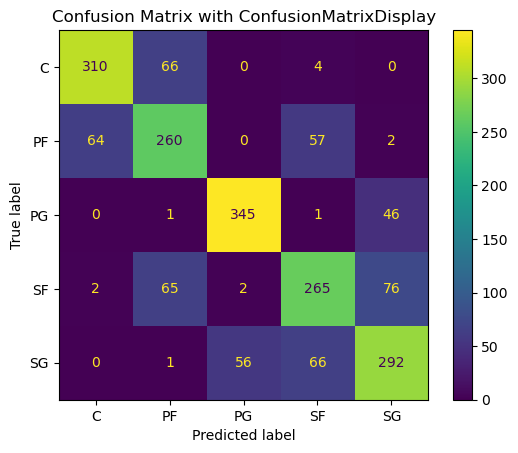

In [29]:
confusion_mat = ConfusionMatrixDisplay.from_estimator(
    best_grid_model, 
    X_test_pos_spec_updated, 
    y_test_pos_spec_updated, 
    display_labels=label_encoder.classes_)

plt.title('Confusion Matrix with ConfusionMatrixDisplay')
plt.show()

In [30]:
wrong_indices = (y_test_pos_spec_updated == label_encoder.transform(['PG'])[0]) & (y_pred_pos_spec_updated_grid == label_encoder.transform(['PF'])[0])

# Retrieve the wrongly predicted samples from the test set
wrong_samples = X_test_pos_spec_updated[wrong_indices].sort_values(by="pts", ascending=False)

wrong_samples

,player_height,player_weight,pts,X3PA,X2P.,TRB.,AST.,USG.
8379,208.28,104.32616,16.9,0.1,0.566,13.7,34.2,22.1


In [31]:
wrong_samples_with_player_info = nba.loc[wrong_samples.index]

In [32]:
wrong_samples_with_player_info

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
8379,Ben Simmons,22,208.28,104.32616,16.9,8.8,7.7,2018-19,PG,34.2,...,0.6,20.0,0.582,13.7,34.2,19.3,22.1,8.2,3.8,3.6


In [75]:
clustering_features = ['pts', 'reb', 'ast', 'player_height', 'player_weight', 'MP.x', 'GS', 'X2P', 'PER', 'USG.', 'X3PA', 'WS', 'VORP', 'BPM', 'X2PA', 'FTA', 'age', 'TOV.', 'eFG.']
X_clustering = nba[clustering_features]

In [76]:
scaler = StandardScaler()
X_clustering_normalized = scaler.fit_transform(X_clustering)

In [77]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 15):  # Checking for up to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_clustering_normalized)
    inertia.append(kmeans.inertia_)

C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_k

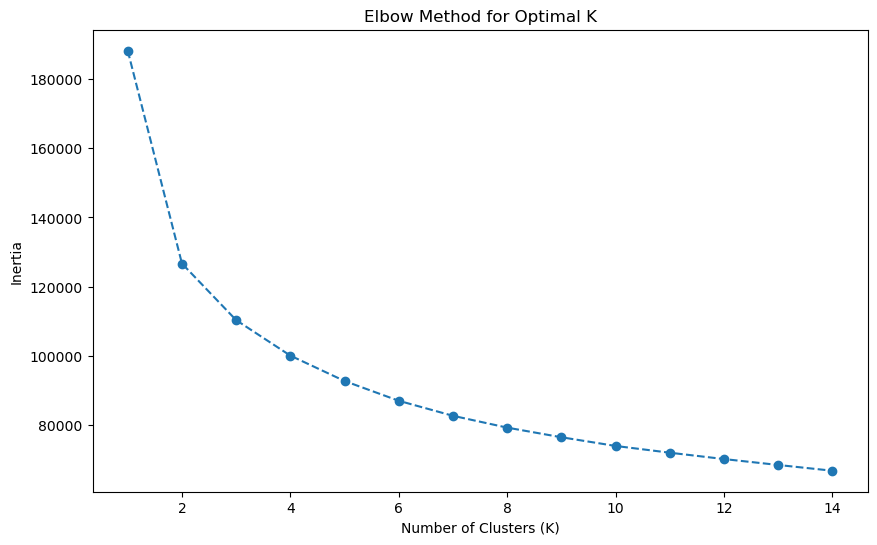

In [78]:
# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_clustering_normalized)

C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
clustered_data = nba.copy()
clustered_data['cluster'] = clusters

In [105]:
cluster_characteristics = clustered_data.groupby('cluster')[clustering_features].mean()
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

In [106]:
cluster_characteristics, cluster_sizes

(               pts       reb       ast  player_height  player_weight  \
 cluster                                                                
 0         6.112500  2.453890  1.063903     199.211110      97.095415   
 1        18.140373  4.240373  5.574783     192.856994      90.807428   
 2        10.164085  2.770765  3.805324     189.595140      87.036972   
 3         4.489055  1.517910  1.916617     190.149114      86.659811   
 4        10.425557  6.542691  1.453437     207.574308     110.023943   
 5        25.293993  7.651237  5.230742     201.790883     103.561625   
 6        16.733050  8.905248  2.343972     208.946525     112.292651   
 7         3.342593  2.623430  0.554267     207.030725     109.701960   
 8         5.783694  4.319301  0.799251     208.407072     110.776341   
 9        12.370078  4.226023  2.163255     200.296082      98.739816   
 
               MP.x         GS       X2P        PER       USG.      X3PA  \
 cluster                                      

In [107]:
nba['cluster'] = clusters

# Filter players by cluster (example for cluster 0)
cluster_0_players = nba[nba['cluster'] == 0]

# View the players in cluster 0
print(cluster_0_players[['normalized_name', 'pts', 'reb', 'ast']])

          normalized_name  pts  reb  ast
132    Courtney Alexander  9.5  2.2  1.0
158         Walt Williams  8.3  3.4  1.3
159          Tyrone Nesby  8.3  2.8  1.2
161           Pat Garrity  8.3  2.8  0.7
162       Stephen Jackson  8.2  2.7  1.8
...                   ...  ...  ...  ...
12155       Stacey Augmon  3.4  2.0  0.9
12174         Bruce Bowen  2.8  1.4  0.5
12176          Steve Kerr  2.8  0.6  0.4
12188          Ryan Bowen  2.5  2.2  0.4
12196        Jud Buechler  2.2  1.6  0.6

[1568 rows x 4 columns]


C:\Users\Nela\AppData\Local\Temp\ipykernel_6672\1618832713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['cluster'] = clusters


In [108]:
# Filter players by cluster (example for cluster 0)
cluster_1_players = nba[nba['cluster'] == 1]

# View the players in cluster 0
print(cluster_1_players[['normalized_name', 'pts', 'reb', 'ast']])

       normalized_name   pts  reb  ast
9      Stephon Marbury  23.9  3.1  7.6
10      Antoine Walker  23.4  8.9  5.5
18      Michael Finley  21.5  5.2  4.4
21          Jalen Rose  20.5  5.0  6.0
24      Jamal Mashburn  20.1  7.6  5.4
...                ...   ...  ...  ...
11896     David Wesley  13.6  2.7  5.6
11897     Tim Hardaway  13.4  2.9  7.4
11907   Rod Strickland  12.6  3.8  7.5
11908   Scottie Pippen  12.5  6.3  5.0
11917    John Stockton  12.1  2.6  8.6

[805 rows x 4 columns]


In [109]:
# Filter players by cluster (example for cluster 0)
cluster_5_players = nba[nba['cluster'] == 5]

# View the players in cluster 0
print(cluster_5_players[['normalized_name', 'pts', 'reb', 'ast']])

        normalized_name   pts   reb  ast
0         Allen Iverson  31.1   3.8  4.6
1      Jerry Stackhouse  29.8   3.9  5.1
2      Shaquille O'Neal  28.7  12.7  3.7
3           Kobe Bryant  28.5   5.9  5.0
4          Vince Carter  27.6   5.5  3.9
...                 ...   ...   ...  ...
11829       Gary Payton  24.2   6.5  8.9
11831        Tim Duncan  23.2  12.4  3.2
11832     Kevin Garnett  22.9  11.8  5.0
11834       Kobe Bryant  22.5   6.3  4.9
11837   Alonzo Mourning  21.7   9.5  1.6

[283 rows x 4 columns]
